# Question 1:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv("train-telecom-churn.csv")
features = ['Monthly Charge', 'Tenure in Months', 'Total Charges', 'Total Long Distance Charges']
X = df[features].dropna()

In [3]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=1172)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

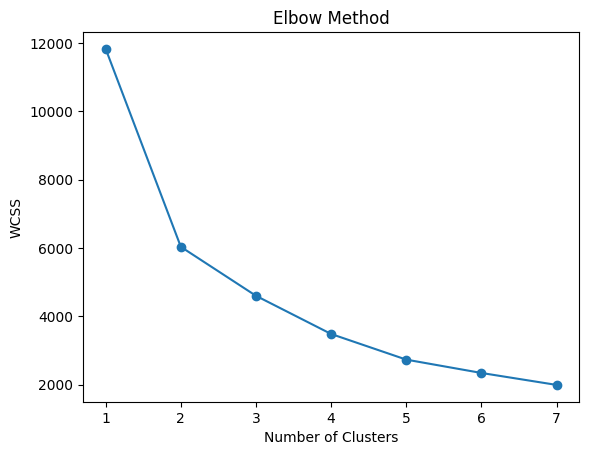

In [4]:
wcss = []
for i in range(1, 8):
    km = KMeans(n_clusters=i, random_state=1172, n_init=10)
    km.fit(X_train_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1, 8), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=4, random_state=1172, n_init=10)
train_clusters = kmeans.fit_predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

In [6]:
from sklearn.metrics import adjusted_rand_score

print("Train Silhouette Score:", silhouette_score(X_train_scaled, train_clusters))
print("Test Silhouette Score:", silhouette_score(X_test_scaled, test_clusters))

y_train = df.loc[X_train.index, 'Churn']
y_test = df.loc[X_test.index, 'Churn']
print("ARI (Train):", adjusted_rand_score(y_train, train_clusters))
print("ARI (Test):", adjusted_rand_score(y_test, test_clusters))

Train Silhouette Score: 0.38068897406884156
Test Silhouette Score: 0.39463176266835714
ARI (Train): 0.021627061737314972
ARI (Test): 0.03008545532241815


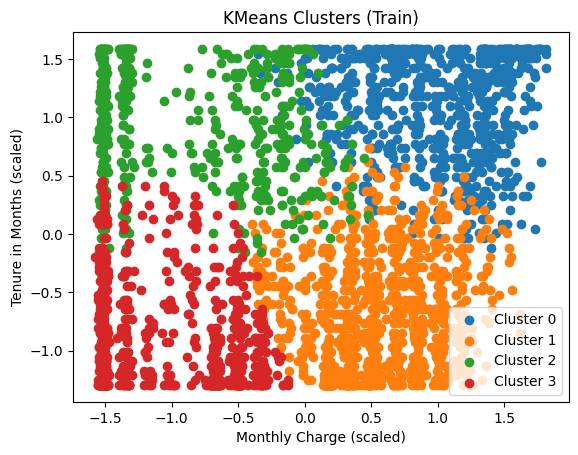

In [7]:
plt.figure()
for c in range(4):
    plt.scatter(X_train_scaled[train_clusters == c, 0],
                X_train_scaled[train_clusters == c, 1], label=f'Cluster {c}')
plt.xlabel('Monthly Charge (scaled)')
plt.ylabel('Tenure in Months (scaled)')
plt.title('KMeans Clusters (Train)')
plt.legend()
plt.show()

# Question 2:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [9]:
data = pd.read_csv('adult.csv')
features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']
X = data[features].copy()

X.replace("?", np.nan, inplace=True)
for col in X.columns:
    X[col].fillna(X[col].mode()[0], inplace=True)

le_dict = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

y_true = data['income']

/tmp/ipython-input-2457081726.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)


In [10]:
# trying different k values using a sample (full data too slow for silhouette)
sil_scores = []
sample_idx = np.random.RandomState(1172).choice(len(X_encoded), 3000, replace=False)
X_sil = X_encoded[sample_idx]

for k in range(2, 6):
    agg_temp = AgglomerativeClustering(n_clusters=k, metric='hamming', linkage='average')
    labels_temp = agg_temp.fit_predict(X_sil)
    sil_scores.append(silhouette_score(X_sil, labels_temp, metric='hamming'))
    print(f"k={k}, Silhouette Score: {sil_scores[-1]:.4f}")

k=2, Silhouette Score: 0.3647
k=3, Silhouette Score: 0.3159
k=4, Silhouette Score: 0.2770
k=5, Silhouette Score: 0.2499


In [11]:
agg = AgglomerativeClustering(n_clusters=2, metric='hamming', linkage='average')
clusters = agg.fit_predict(X_encoded)

print("\nCluster Distribution:\n")
print(pd.Series(clusters).value_counts().sort_index())


Cluster Distribution:

0    32536
1       25
Name: count, dtype: int64


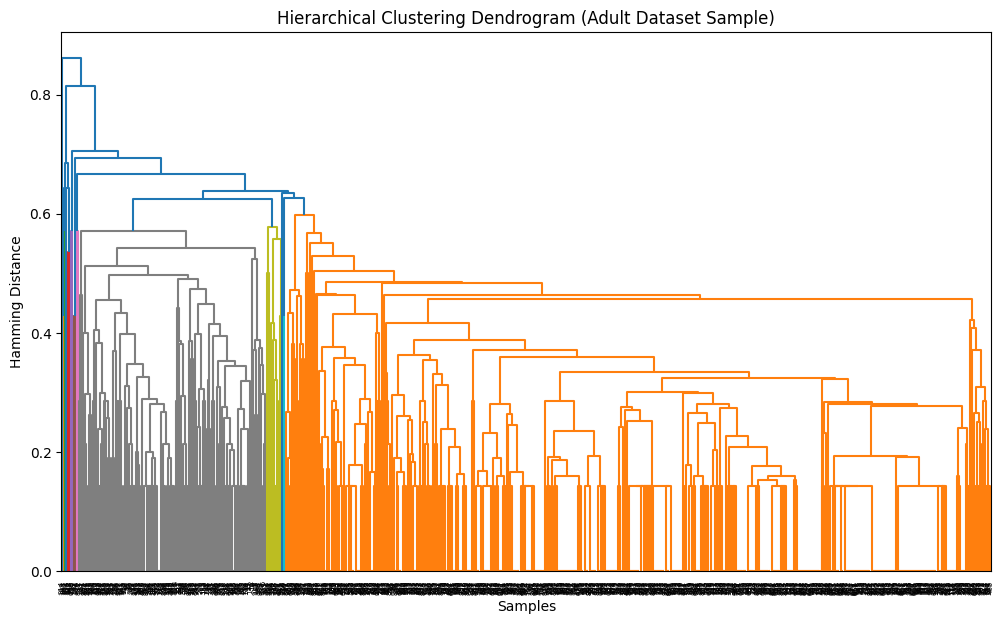

In [12]:
sample_size = 1000
X_sample = X_encoded[:sample_size]

linked = linkage(X_sample, method='average', metric='hamming')

plt.figure(figsize=(12, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram (Adult Dataset Sample)")
plt.xlabel("Samples")
plt.ylabel("Hamming Distance")
plt.show()

In [13]:
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(data['income'])

sil_score = silhouette_score(X_encoded, clusters, metric='hamming')
ari_score = adjusted_rand_score(y_encoded, clusters)

print("Silhouette Score:", sil_score)
print("ARI Score:", ari_score)

Silhouette Score: 0.3216980347356974
ARI Score: 0.0003438712563620509
